**Applying K-Means Clustering for iris data**

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df=sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df1= df.drop_duplicates()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [10]:
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

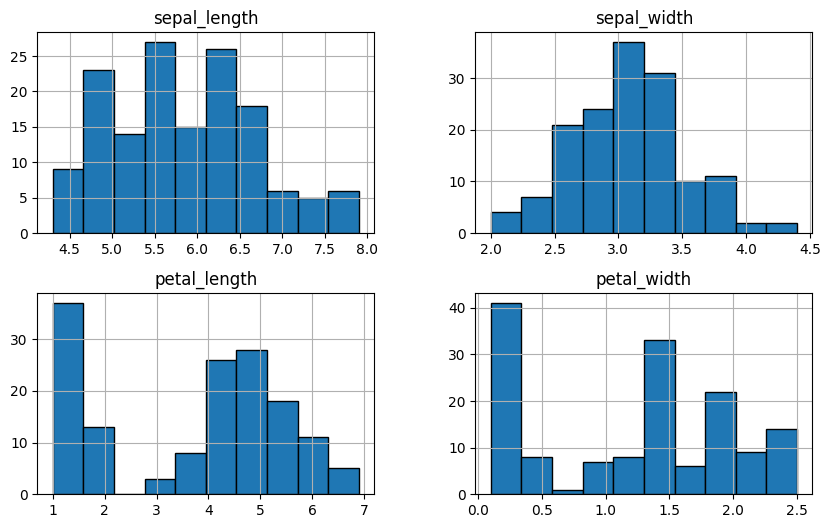

In [11]:
import matplotlib.pyplot as plt
df1.hist(figsize=(10,6), bins=10, edgecolor='k')
plt.show()

In [12]:
df1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
df2= df1.drop('species', axis=1)

In [14]:
from sklearn.cluster import KMeans
wcss=[]

for k in range(1,11):
    km= KMeans(n_clusters=k, random_state=42)
    km.fit(df2)
    wcss.append(km.inertia_)

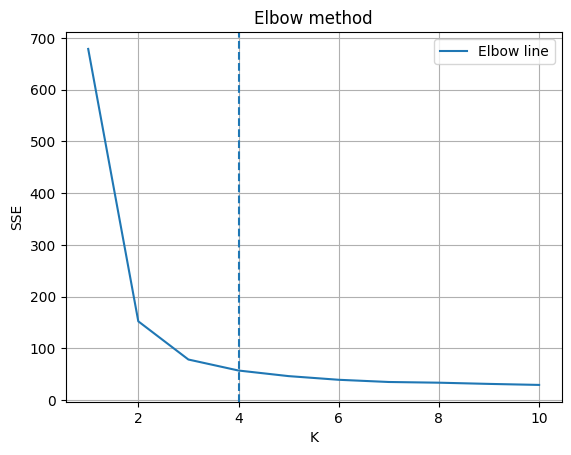

In [15]:
plt.plot(range(1,11), wcss, label='Elbow line')
plt.axvline(4, linestyle='--')
plt.xlabel('K')
plt.ylabel('SSE')
plt.grid()
plt.legend()
plt.title('Elbow method')
plt.show()

In [16]:
df2.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [17]:
x= df2[['sepal_length', 'sepal_width']]
Kmeans= KMeans(n_clusters=5, random_state=42) 
Kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [18]:
Kmeans.cluster_centers_

array([[5.84047619, 2.70952381],
       [6.54615385, 3.04615385],
       [5.21333333, 3.65333333],
       [7.475     , 3.125     ],
       [4.76923077, 2.93076923]])

In [19]:
pred= Kmeans.predict(x)
pred

array([2, 4, 4, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 2, 2, 1, 1, 1, 0, 1, 0, 1, 4, 1, 4, 4, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 4, 0, 1, 0, 3, 1, 1, 3, 4, 3, 1, 3,
       1, 1, 1, 0, 0, 1, 1, 3, 3, 0, 1, 0, 3, 1, 1, 3, 0, 0, 1, 3, 3, 3,
       1, 1, 0, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

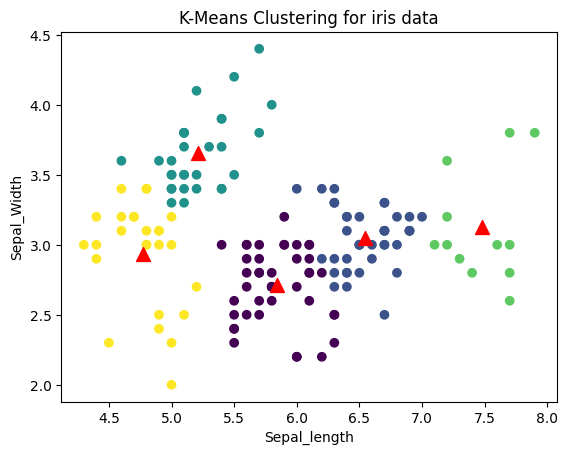

In [20]:
plt.scatter(x.iloc[:, 0], x.iloc[:,1], c=pred, cmap='viridis', marker='o')
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s=100, c='red', marker='^')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_Width')
plt.title('K-Means Clustering for iris data')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score
print(f"Silhouette_ Score", {silhouette_score(x, pred)})

Silhouette_ Score {np.float64(0.4109159130357202)}
